In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_style("whitegrid")

In [27]:
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelcolor'] = 'green'

In [5]:
%matplotlib inline

In [6]:
data_info = pd.read_csv('C:/Users/RAVI/TensorFlow_FILES/TensorFlow_FILES/DATA/lending_club_info.csv', index_col='LoanStatNew')

In [7]:
data_info.head()

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [8]:
print(data_info.loc['loan_amnt', 'Description'])

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [9]:
def print_col_info(col_name):
    print(data_info.loc[col_name, 'Description'])

In [10]:
print_col_info('int_rate')

Interest Rate on the loan


In [11]:
df = pd.read_csv('C:/Users/RAVI/TensorFlow_FILES/TensorFlow_FILES/DATA/lending_club_loan_two.csv')

In [12]:
pd.set_option('display.max_columns', None)

In [15]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [82]:
len(df.emp_title.unique())

173106

In [86]:
len(df.sub_grade.unique())

35

In [102]:
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0)

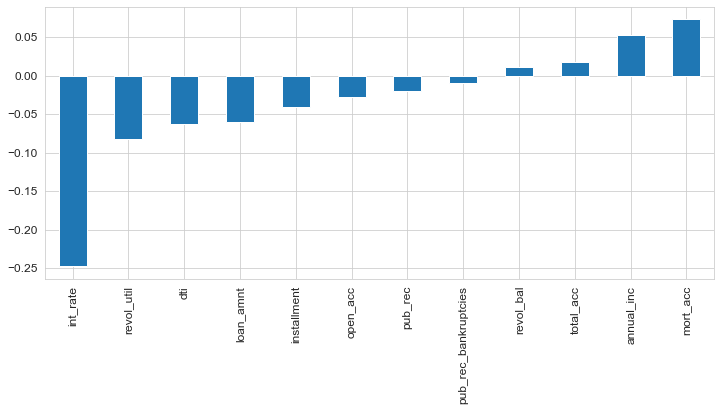

In [108]:
df.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

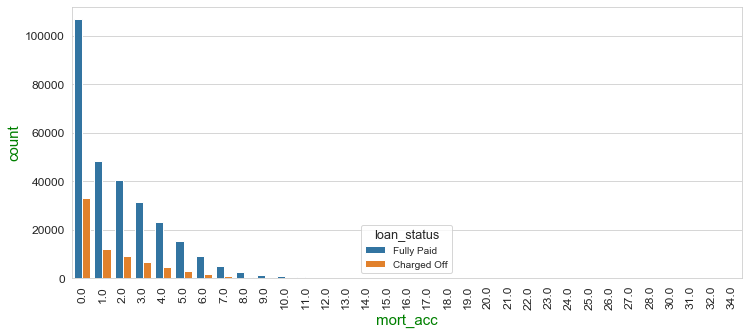

In [113]:
sns.countplot(x='mort_acc', hue='loan_status', data=df)
plt.xticks(rotation=90)

In [13]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [70]:
df['issue_year'] = df.earliest_cr_line.apply(lambda x:x.split('-')[1])

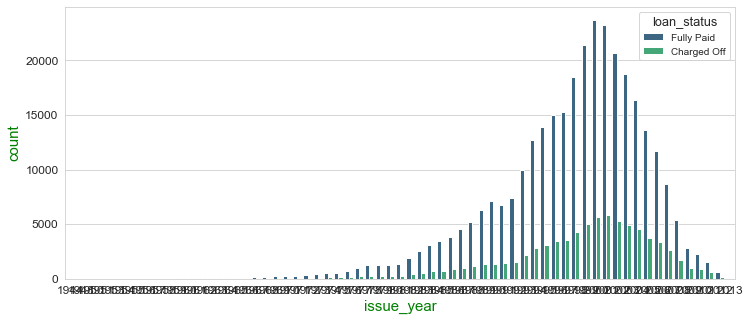

In [71]:
count_plot('issue_year')

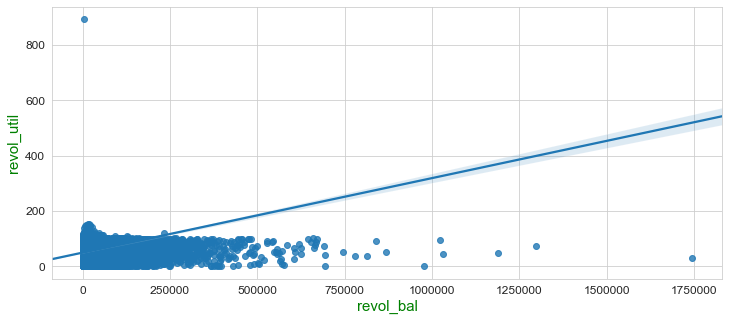

In [61]:
sns.regplot('revol_bal', 'revol_util', data=df)

In [53]:
df['postal_code'] = df['address'].apply(lambda x: x.split('\n')[1].split()[-2:][-1])

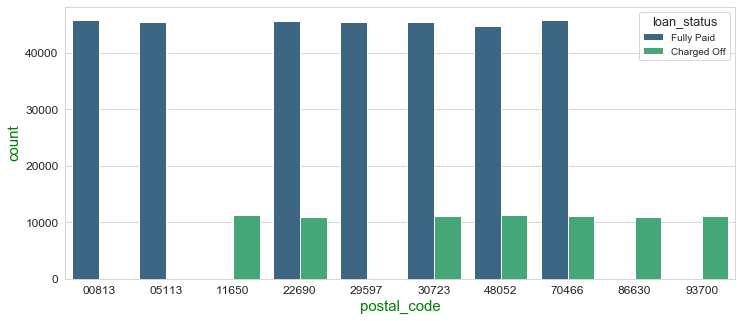

In [54]:
count_plot('postal_code')

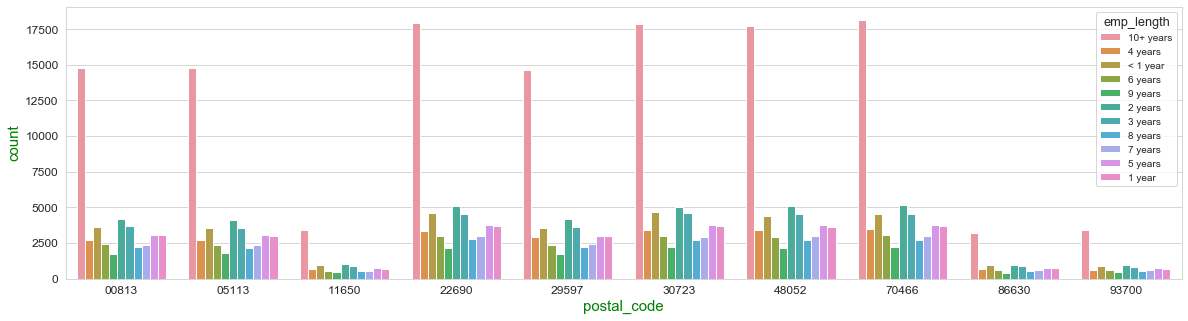

In [59]:
plt.figure(figsize=(20,5))
sns.countplot('postal_code', hue='emp_length', data=df)


In [58]:
(45824+45402+11226+45471+10981+11151)/len(df)

0.42939928793273235

In [60]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


In [57]:
df.groupby(['postal_code','loan_status']).count()

loan_amnt   term  int_rate  installment  grade  \
postal_code loan_status                                                   
00813       Fully Paid       45824  45824     45824        45824  45824   
05113       Fully Paid       45402  45402     45402        45402  45402   
11650       Charged Off      11226  11226     11226        11226  11226   
22690       Charged Off      10954  10954     10954        10954  10954   
            Fully Paid       45573  45573     45573        45573  45573   
29597       Fully Paid       45471  45471     45471        45471  45471   
30723       Charged Off      11021  11021     11021        11021  11021   
            Fully Paid       45525  45525     45525        45525  45525   
48052       Charged Off      11192  11192     11192        11192  11192   
            Fully Paid       44725  44725     44725        44725  44725   
70466       Charged Off      11148  11148     11148        11148  11148   
            Fully Paid       45837  45837     45837        45837  45837   
86630       Charged Off      10981  10981     10981        10981  10981   
93700       Charged Off      11151  11151     11151        11151  11151   

                         sub_grade  emp_title  emp_length  home_ownership  \
postal_code loan_status                                                     
00813       Fully Paid       45824      43375       43905           45824   
05113       Fully Paid       45402      42968       43481           45402   
11650       Charged Off      11226      10350       10498           11226   
22690       Charged Off      10954      10099       10231           10954   
            Fully Paid       45573      43117       43660           45573   
29597       Fully Paid       45471      43047       43593           45471   
30723       Charged Off      11021      10192       10320           11021   
            Fully Paid       45525      43109       43615           45525   
48052       Charged Off      11192      10337       10466           11192   
            Fully Paid       44725      42373       42908           44725   
70466       Charged Off      11148      10262       10383           11148   
            Fully Paid       45837      43384       43932           45837   
86630       Charged Off      10981      10164       10299           10981   
93700       Charged Off      11151      10326       10438           11151   

                         annual_inc  verification_status  issue_d  purpose  \
postal_code loan_status                                                      
00813       Fully Paid        45824                45824    45824    45824   
05113       Fully Paid        45402                45402    45402    45402   
11650       Charged Off       11226                11226    11226    11226   
22690       Charged Off       10954                10954    10954    10954   
            Fully Paid        45573                45573    45573    45573   
29597       Fully Paid        45471                45471    45471    45471   
30723       Charged Off       11021                11021    11021    11021   
            Fully Paid        45525                45525    45525    45525   
48052       Charged Off       11192                11192    11192    11192   
            Fully Paid        44725                44725    44725    44725   
70466       Charged Off       11148                11148    11148    11148   
            Fully Paid        45837                45837    45837    45837   
86630       Charged Off       10981                10981    10981    10981   
93700       Charged Off       11151                11151    11151    11151   

                         title    dti  earliest_cr_line  open_acc  pub_rec  \
postal_code loan_status                                                      
00813       Fully Paid   45611  45824             45824     45824    45824   
05113       Fully Paid   45222  45402             45402     45402    45402   
11650       Charged Off  11165

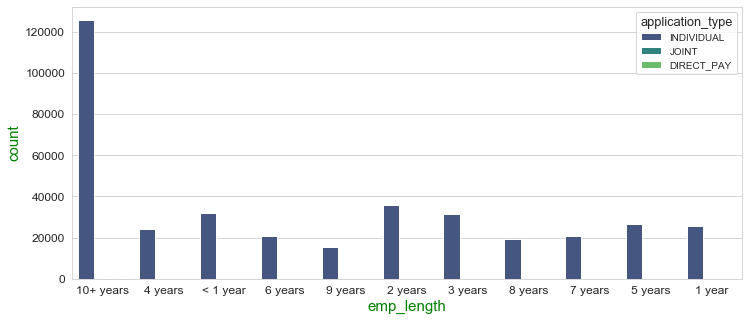

In [45]:
sns.countplot(x='emp_length', hue='application_type', data=df, palette='viridis')

In [17]:
df.shape

(396030, 27)

In [20]:
df.emp_title.value_counts()

Teacher                            4389
Manager                            4250
Registered Nurse                   1856
RN                                 1846
Supervisor                         1830
                                   ... 
Wave Hill Breads                      1
Lakeview cheese co.                   1
Customer Service Representitive       1
lineage cold storage                  1
Enterprise Solutions Integrator       1
Name: emp_title, Length: 173105, dtype: int64

In [21]:
df.emp_length.value_counts()

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: emp_length, dtype: int64

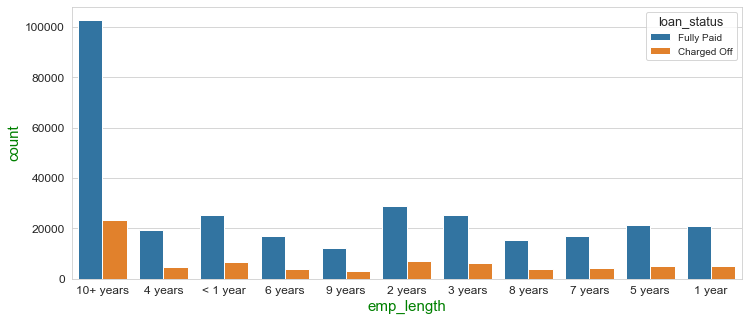

In [25]:
sns.countplot(x='emp_length', hue='loan_status', data=df)

In [14]:
def count_plot(col_name, palette='viridis'):
    sns.countplot(x=col_name, hue='loan_status', data=df, palette=palette)

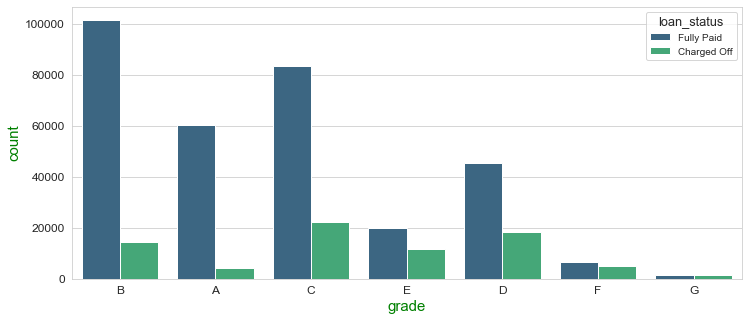

In [30]:
count_plot('grade')

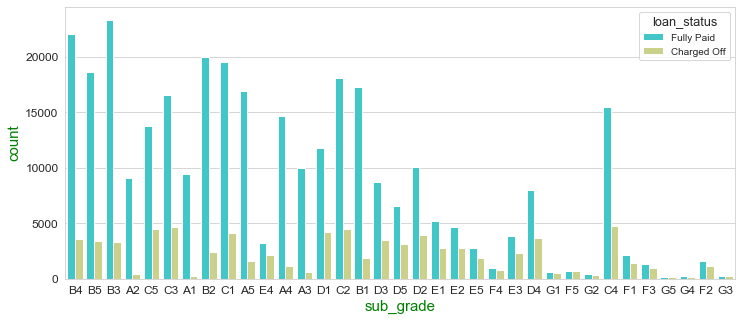

In [32]:
count_plot('sub_grade','rainbow')

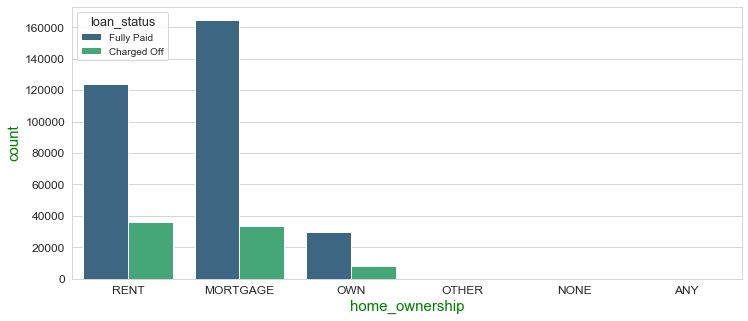

In [35]:
count_plot('home_ownership')

In [25]:
df.title.value_counts()[:15]

Debt consolidation           152472
Credit card refinancing       51487
Home improvement              15264
Other                         12930
Debt Consolidation            11608
Major purchase                 4769
Consolidation                  3852
debt consolidation             3547
Business                       2949
Debt Consolidation Loan        2864
Medical expenses               2742
Car financing                  2139
Credit Card Consolidation      1775
Vacation                       1717
Moving and relocation          1689
Name: title, dtype: int64

In [19]:
df.purpose.value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

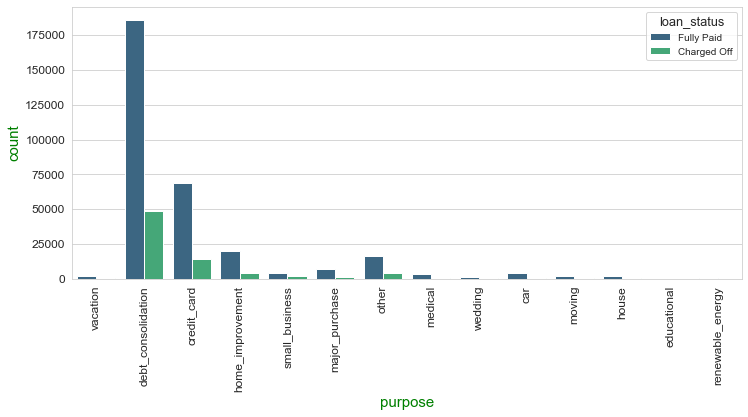

In [29]:
count_plot('purpose')
plt.xticks(rotation=90)

In [30]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

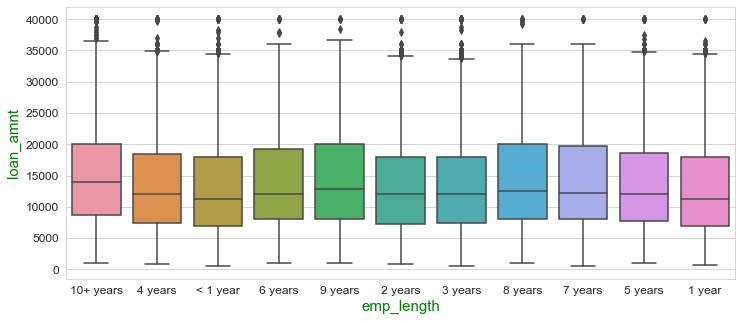

In [32]:
sns.boxplot(x='emp_length', y='loan_amnt', data=df)

In [33]:
df.loan_status.value_counts()/len(df)

Fully Paid     0.803871
Charged Off    0.196129
Name: loan_status, dtype: float64

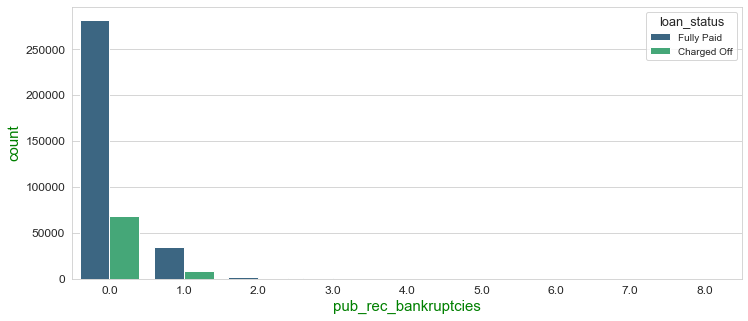

In [34]:
count_plot('pub_rec_bankruptcies')

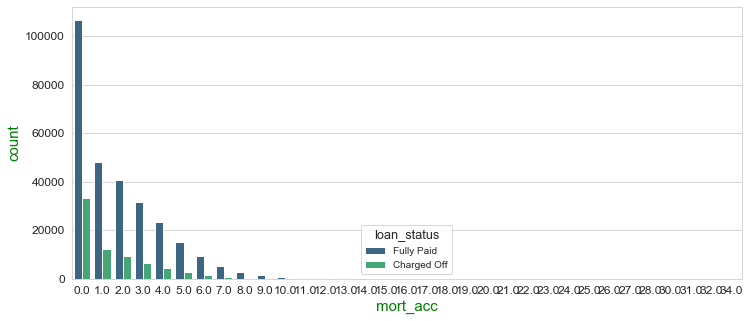

In [37]:
count_plot('mort_acc')

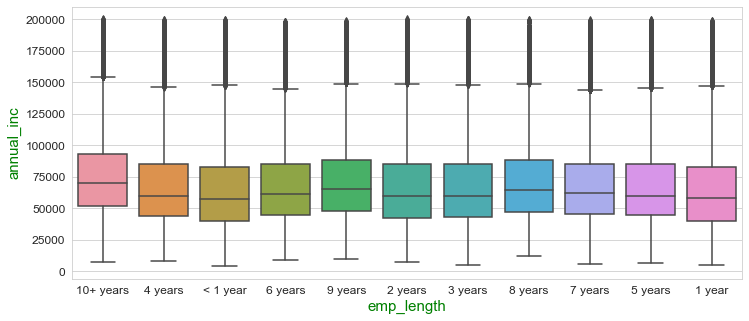

In [41]:
sns.boxplot(x='emp_length', y='annual_inc', data=df[df['annual_inc']<200000])

In [114]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
postal_code                 0
issue_year                  0
loan_repaid                 0
dtype: int64

In [116]:
df.drop(['issue_year','emp_title','emp_length','title'],axis=1, inplace=True)

In [117]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
postal_code                 0
loan_repaid                 0
dtype: int64

In [121]:
df['revol_util'].describe()

count    395754.000000
mean         53.791749
std          24.452193
min           0.000000
25%          35.800000
50%          54.800000
75%          72.900000
max         892.300000
Name: revol_util, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

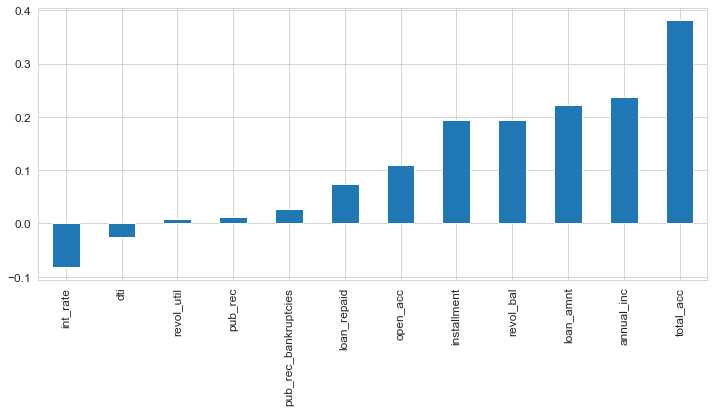

In [123]:
df.corr()['mort_acc'].sort_values()[:-1].plot(kind='bar')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

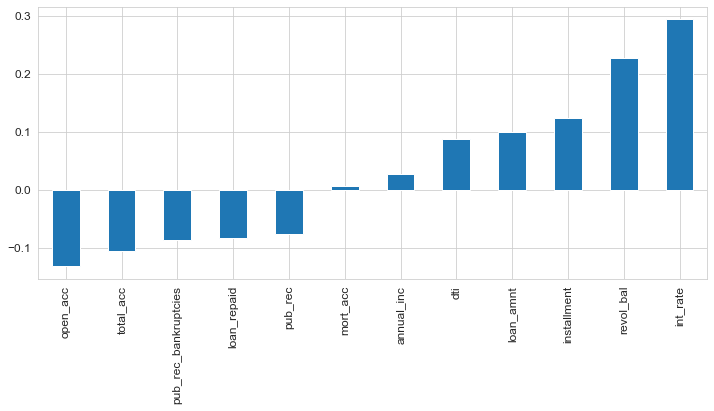

In [133]:
df.corr()['revol_util'].sort_values()[:-1].plot(kind='bar')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

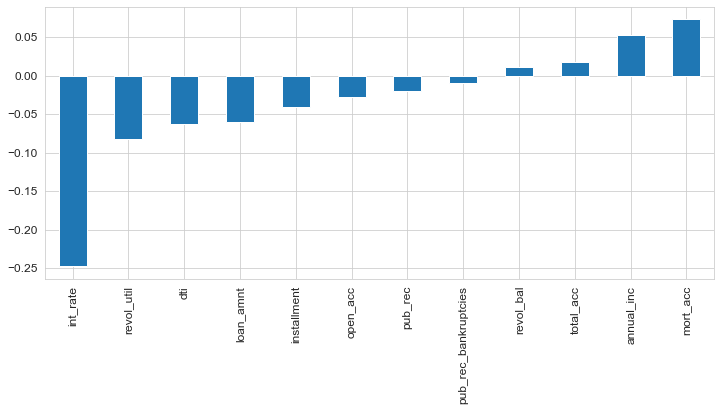

In [145]:
df.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar')
plt.xticks(rotation=90)

In [128]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,postal_code,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",22690,1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",05113,1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",05113,1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",00813,1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",11650,0


In [139]:
df.columns 

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'postal_code', 'loan_repaid'],
      dtype='object')

In [129]:
len(df['pub_rec'].unique())

20

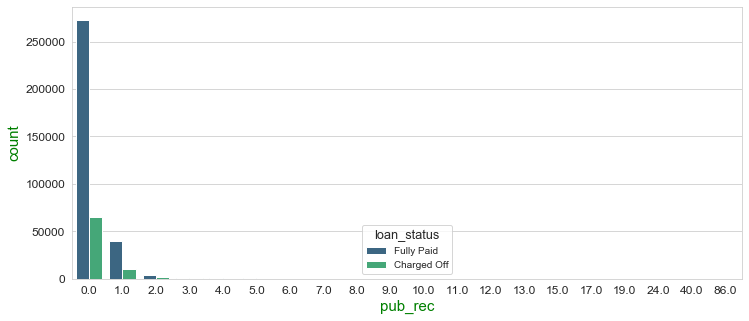

In [130]:
count_plot('pub_rec')

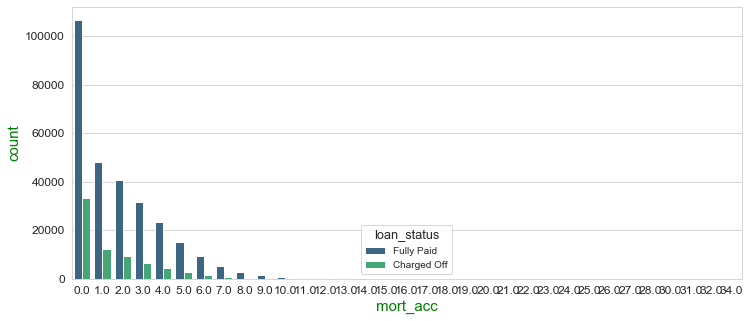

In [132]:
count_plot('mort_acc')

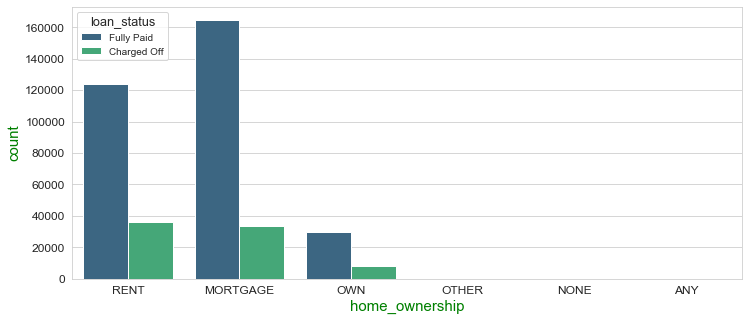

In [138]:
count_plot('home_ownership')

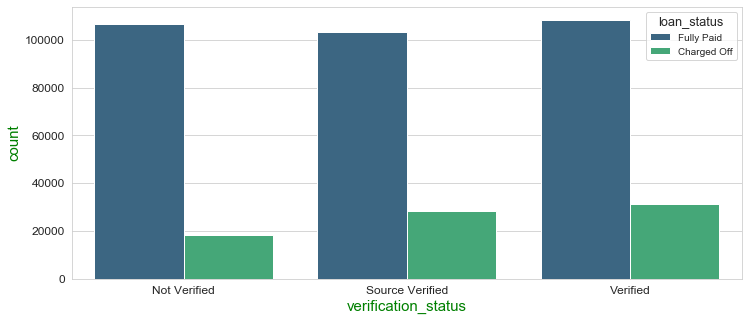

In [135]:
count_plot('verification_status')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

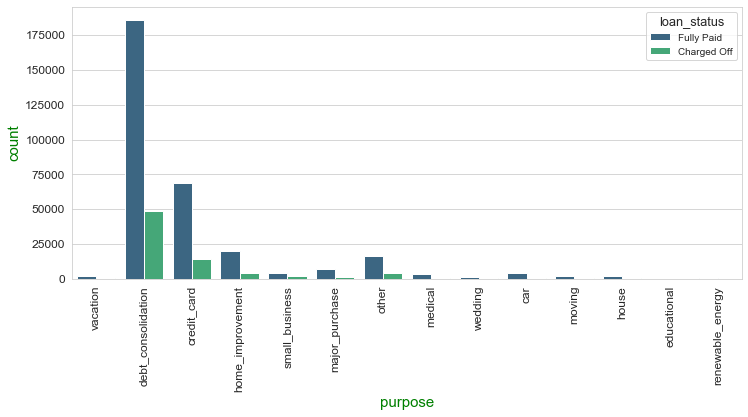

In [136]:
count_plot('purpose')
plt.xticks(rotation=90)

In [140]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
postal_code                 0
loan_repaid                 0
dtype: int64

In [141]:
data = df.drop(['revol_util','mort_acc','pub_rec_bankruptcies'],axis=1)

In [142]:
data.isna().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
address                0
postal_code            0
loan_repaid            0
dtype: int64

In [143]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,address,postal_code,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,25.0,w,INDIVIDUAL,"0174 Michelle Gateway\nMendozaberg, OK 22690",22690,1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,27.0,f,INDIVIDUAL,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",05113,1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,26.0,f,INDIVIDUAL,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",05113,1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,13.0,f,INDIVIDUAL,"823 Reid Ford\nDelacruzside, MA 00813",00813,1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,43.0,f,INDIVIDUAL,"679 Luna Roads\nGreggshire, VA 11650",11650,0


In [148]:
categorical_cols = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'postal_code']

In [152]:
for col in categorical_cols:
    dummie_dataset = pd.get_dummies(df[col], drop_first=True)
    data = data.join(dummie_dataset)

In [155]:
drop_cols = categorical_cols+['issue_d', 'earliest_cr_line', 'address']

In [157]:
data.drop(drop_cols, axis=1, inplace=True)

In [158]:
data.head()

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,total_acc,loan_repaid,60 months,B,C,D,E,F,G,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,MORTGAGE,NONE,OTHER,OWN,RENT,Source Verified,Verified,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,w,INDIVIDUAL,JOINT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,25.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0
1,8000.0,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,27.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,15600.0,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,26.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,7200.0,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,13.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,24375.0,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,43.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [160]:
data.drop('loan_status', axis=1, inplace=True)

In [175]:
data.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'loan_repaid', ' 60 months', 'B',
       'C', 'D', 'E', 'F', 'G', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4',
       'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1',
       'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5', 'MORTGAGE', 'NONE', 'OTHER', 'OWN', 'RENT',
       'Source Verified', 'Verified', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'w', 'INDIVIDUAL', 'JOINT', '05113', '11650', '22690',
       '29597', '30723', '48052', '70466', '86630', '93700'],
      dtype='object')

In [176]:
drop_cols_1 = ['05113', '11650', '22690', '29597', '30723', '48052', '70466', '86630', '93700']

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 83 columns):
loan_amnt             396030 non-null float64
int_rate              396030 non-null float64
installment           396030 non-null float64
annual_inc            396030 non-null float64
dti                   396030 non-null float64
open_acc              396030 non-null float64
pub_rec               396030 non-null float64
revol_bal             396030 non-null float64
total_acc             396030 non-null float64
loan_repaid           396030 non-null int64
 60 months            396030 non-null uint8
B                     396030 non-null uint8
C                     396030 non-null uint8
D                     396030 non-null uint8
E                     396030 non-null uint8
F                     396030 non-null uint8
G                     396030 non-null uint8
A2                    396030 non-null uint8
A3                    396030 non-null uint8
A4                    396030 non-nu

In [177]:
data.drop(drop_cols_1, axis=1, inplace=True)

In [178]:
X = data.drop('loan_repaid', axis=1)
y = data['loan_repaid']

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [165]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [184]:
model = Sequential()

In [185]:
model.add(Dense(82, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [186]:
model.compile(optimizer='adam', loss='binary_crossentropy')